<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Ticker_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:06:53 Starting...
14:06:53 Installing yfinance into Google notebook...
14:07:00 Installing arch into Google notebook...
14:07:10 Initialized.


In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-22,3.706024,5.096365,4.379641,8.907682,9.067760,11.717613,1.885489,2.670986,4.822658,3.652532,...,7.541468,11.181630,4.546986,3.495528,2.213221,3.443917,7.429707,3.688235,1.514900,3.449405
2025-05-23,-0.287764,-7.610570,-8.919507,-8.683071,-4.058241,-8.816504,-3.975716,-6.739054,-8.241209,-6.075152,...,-12.243737,-8.257118,-7.796392,-3.157539,-14.846602,-7.014469,-7.047079,-6.206744,-5.582753,-6.217684
2025-05-24,2.111188,-0.053490,0.389439,-0.430221,-1.084222,1.214575,0.488242,-0.011870,0.011461,-0.448684,...,0.682372,-2.436350,0.628931,1.093037,3.097889,2.382991,0.455141,0.310184,1.528067,-0.134585


14:07:14 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


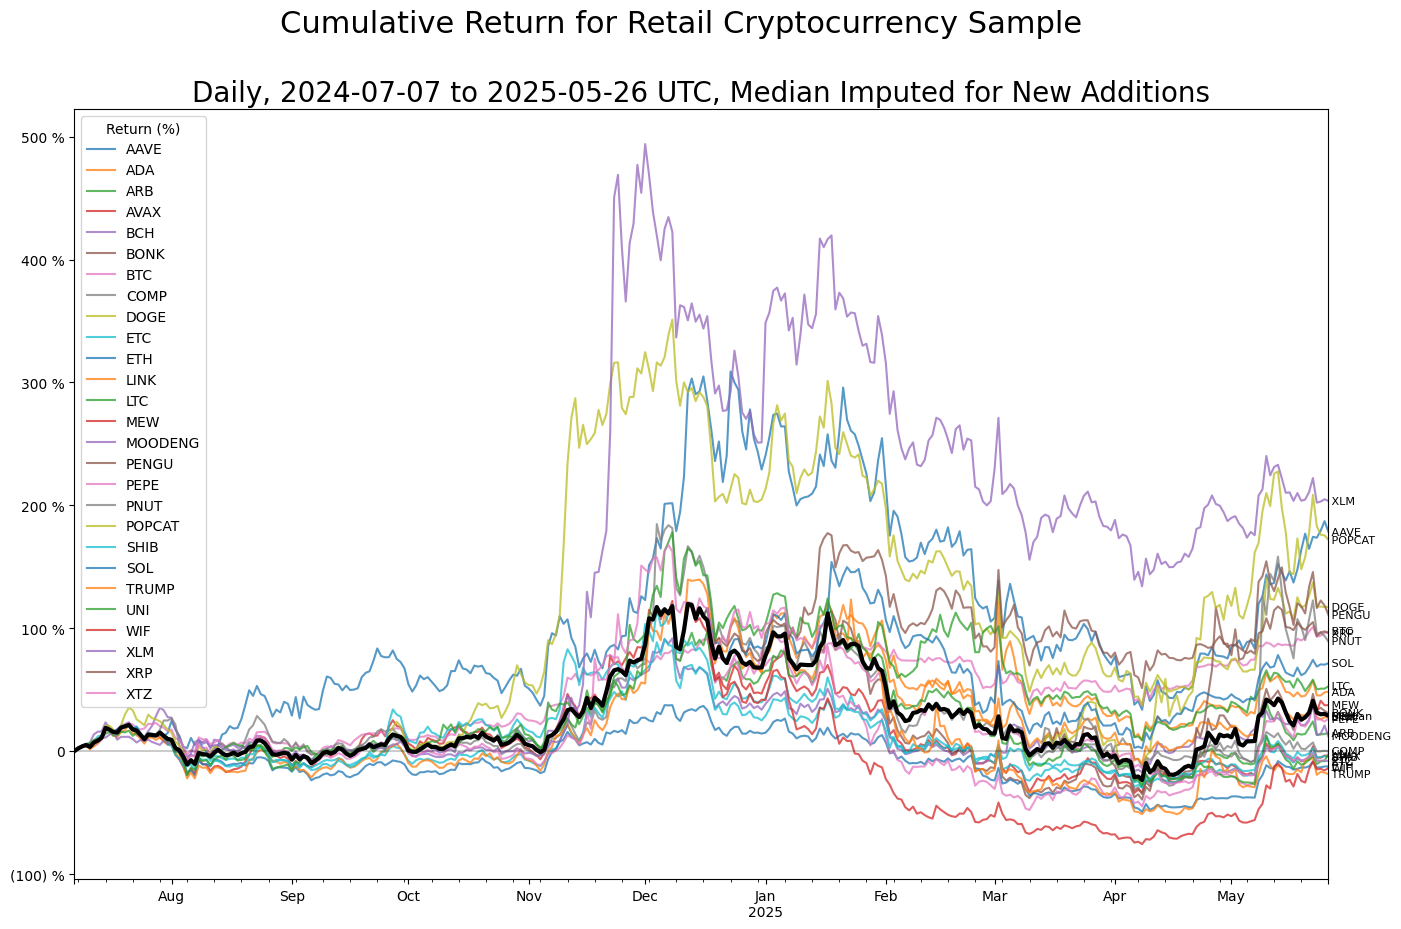

In [3]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

14:07:22 Excluding recently listed coins from analysis: MEW, MOODENG...
14:07:22 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.5058823529411764), pvalue=np.float64(0.045581616123940336))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.478249,0.771353,5.206534,74,0.605247,1.274443,0.202506,,1,0.0
ADA,0.138190,0.197402,4.175885,74,0.485437,0.406647,0.684267,,2,0.0
ARB,0.423819,0.343549,5.678332,74,0.660093,0.520456,0.602746,,3,0.0
AVAX,0.193567,0.432268,4.876669,74,0.566901,0.762511,0.445755,,4,0.0
BCH,0.141677,0.416018,4.045575,74,0.470289,0.884602,0.376371,,5,0.0
BTC,0.279730,0.438532,2.425606,74,0.281971,1.555239,0.119889,,7,0.0
COMP,-0.107097,0.147827,4.082462,74,0.474577,0.311492,0.755426,,8,0.0
ETC,-0.150125,0.102730,3.612369,74,0.419929,0.244636,0.806738,,10,0.0
ETH,0.056065,0.526944,4.599092,74,0.534634,0.985617,0.324321,,11,0.0


14:07:22
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     5.531
Date:                Mon, 26 May 2025   Prob (F-statistic):             0.0338
Time:                        14:07:22   Log-Likelihood:                 5.2425
No. Observations:                  16   AIC:                            -6.485
Df Residuals:                      14   BIC:                            -4.940
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,,,
AAVE,0.478249,0.771353,5.206534,74,0.605247,1.274443,0.202506,,1,0.0,0.489299
ADA,0.138190,0.197402,4.175885,74,0.485437,0.406647,0.684267,,2,0.0,0.465524
ARB,0.423819,0.343549,5.678332,74,0.660093,0.520456,0.602746,,3,0.0,0.441749
AVAX,0.193567,0.432268,4.876669,74,0.566901,0.762511,0.445755,,4,0.0,0.417975
BCH,0.141677,0.416018,4.045575,74,0.470289,0.884602,0.376371,,5,0.0,0.394200
BONK,0.117872,1.213073,7.900227,74,0.918383,1.320880,0.186541,,6,1.0,NaN
BTC,0.279730,0.438532,2.425606,74,0.281971,1.555239,0.119889,,7,0.0,0.370426
COMP,-0.107097,0.147827,4.082462,74,0.474577,0.311492,0.755426,,8,0.0,0.346651
DOGE,-0.001617,0.548032,5.214242,74,0.606143,0.904130,0.365926,,9,1.0,NaN


14:07:24 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


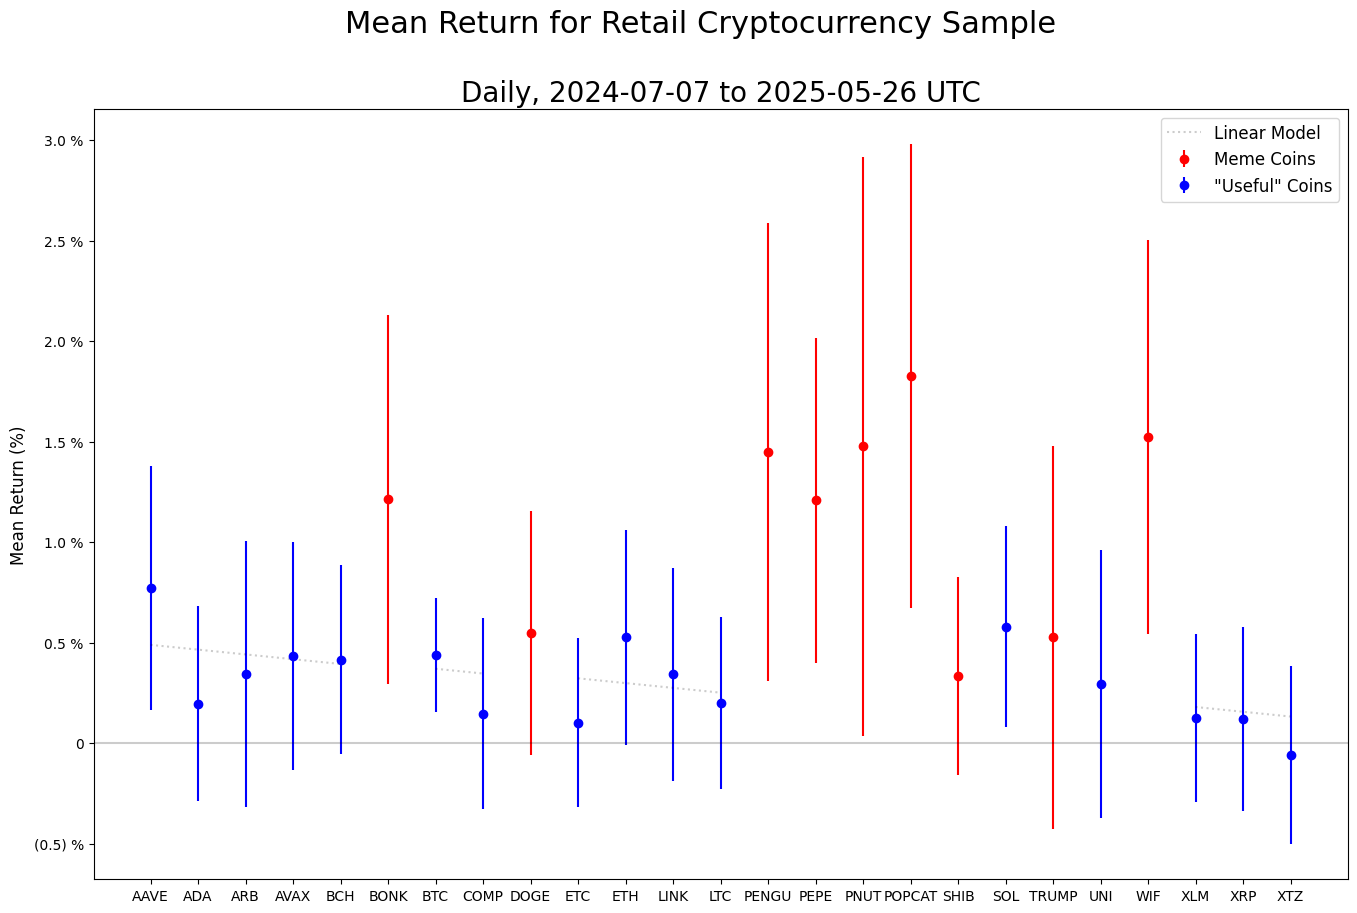

In [4]:
from scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's, to ensure we have sufficient history for this analysis
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in (meme_coins:="BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG") else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
nprint("Rank Correlation for 'Useful' Coins:",spearmanr(x,y))

design=report.loc[u:=x];display(design)
design["Symbol Rank"]=list(range(1,design.index.shape[0]+1))
fit=OLS(y:=design["Mean"],add_constant(x:=design["Symbol Rank"])).fit()
nprint("OLS Regression for 'Useful' Coins",fit.summary(),sep="\n")
report.loc[design.index,"Linear Model"]=fit.predict()
display(report)

plot.plot(x:=report.index,y:=report["Linear Model"],':',color='black',alpha=0.2,label="Linear Model")
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [5]:
from warnings import catch_warnings,simplefilter

design=data[report[report["Meme Coin"]==zero].index].dropna()
results=pd.DataFrame(index=design.columns)
nprint("Fitting AR(1)-GARCH(1,1) Model with GED Innovations for %s to %s UTC..." % (design.index[0],design.index[-1]))

for ticker in tqdm(design.columns):
    model=ARX(design[ticker],lags=[1])
    model.volatility = GARCH2(1,0,1)
    model.distribution = GeneralizedError2()

    with catch_warnings():
        simplefilter("ignore")
        ged_model=model.fit(update_freq=0,disp='Off',options={'maxiter':1000})

        if ged_model.convergence_flag==0:
            for field in "Estimate","Std.Err.":
                results.loc[ticker,"Drift,%s" % field]=(g:=ged_model.params if field=="Estimate" else ged_model.std_err)["Const"]
                results.loc[ticker,"Return,%s" % field]=g[ticker+"[1]"]
                results.loc[ticker,"C,%s" % field]=g["omega"]
                results.loc[ticker,"A,%s" % field]=g["alpha[1]"]
                results.loc[ticker,"B,%s" % field]=g["beta[1]"]
                results.loc[ticker,"nu,%s" % field]=g["nu"]

            results.loc[ticker,"variance,Estimate"]=results.loc[ticker,"C,Estimate"]/(one-results.loc[ticker,"B,Estimate"]-results.loc[ticker,"B,Estimate"])

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:tuple(x.split(",")),results.columns)))
spearman=pd.DataFrame(index=(lambda x:dict.fromkeys(x).keys())(results.columns.get_level_values(0)))
results.sort_index(axis=1,inplace=True)
display(results)

nprint("Analysis of correlation with ticker ranks...")

for estimator in spearman.index:
    spearman.loc[estimator,"Rank Correlation"]=(R:=spearmanr(x:=results.index,y:=results.xs("Estimate",axis=1,level=1)[estimator])).statistic
    spearman.loc[estimator,"Sample"]=(n:=len(x))
    spearman.loc[estimator,"t Statistic"]=R.statistic*((n-two)/(one-R.statistic**two))**half
    spearman.loc[estimator,"p Value"]=R.pvalue

spearman["Significance"]=spearman["p Value"].apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else "")
display(spearman.sort_values("Rank Correlation",ascending=False))

nprint("Most significant result",(p:=spearman["p Value"].min())," or larger found by chance with probability",one-(one-p)**(n:=spearman.shape[0]),"in a set of",n,"independent tests.")

14:07:25 Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for 2025-03-05 to 2025-05-26 UTC...


  0%|          | 0/16 [00:00<?, ?it/s]

A                           B                        C  \
            Estimate      Std.Err.      Estimate      Std.Err.   Estimate   
Return (%)                                                                  
AAVE        0.010431  5.547671e-02  5.672703e-01  3.752570e-01  10.812735   
ADA         0.098563  1.660345e-01  6.416738e-01  2.724979e-01   4.763918   
ARB         0.112552  9.305356e-02  6.539950e-01  9.837581e-02   7.737799   
AVAX       -0.147881  4.421749e-11  1.107278e+00  2.564192e-10   1.779309   
BCH         0.058233  4.561395e-01  6.214210e-01  7.071852e-01   5.585796   
BTC        -0.113591  5.169344e-07  1.091681e+00  6.638125e-08   0.241734   
COMP        0.047661  8.161511e-02  7.545217e-01  9.191855e-02   3.375054   
ETC         0.097457  6.865983e-02  3.009387e-01  3.408047e-01   8.527544   
ETH         0.534631  7.648186e+00  3.748133e-14  7.882009e+00  14.706294   
LINK       -0.126180  6.201606e-11  1.096759e+00  4.170754e-10   0.829870   
LTC         0.050165  1.008043e-01  6.129293e-01  1.385642e-01   4.656266   
SOL         0.067075  1.069377e-01  8.160051e-01  1.336734e-01   2.127508   
UNI         0.181287  2.139089e-01  4.020562e-01  8.242235e-01  15.353175   
XLM         0.086889  1.072980e-01  5.366065e-01  1.331598e-01   5.064097   
XRP         0.157281  1.563614e-01  6.255318e-01  1.447099e-01   3.809584   
XTZ         0.059458  1.087078e-01  4.949624e-01  9.028292e-01   7.277318   

                             Drift              Return                  nu  \
                Std.Err.  Estimate  Std.Err.  Estimate  Std.Err.  Estimate   
Return (%)                                                                   
AAVE        1.175779e+01  0.107760  0.856447 -0.147894  0.162508  1.249538   
ADA         4.216905e+00 -0.267488  1.211672 -0.159804  0.466305  1.121521   
ARB         4.540951e+00  0.453613  0.000102  0.026705  0.000035  0.850759   
AVAX        1.391419e-08 -0.723178  0.003039 -0.203992  0.000002  1.898862   
BCH         3.102145e+00 -0.053930  3.481408 -0.118869  1.037106  1.067826   
BTC         4.438344e-03  0.143280  0.032851 -0.054283  0.014988  1.599438   
COMP        1.915661e+00 -0.232032  0.505974 -0.037655  0.166300  1.227181   
ETC         5.272036e+00 -0.269099  0.000745 -0.097997  0.000895  1.017239   
ETH         1.159851e+02  0.122494  0.000095 -0.232292  0.000320  0.636890   
LINK        1.322197e-05  0.003571  0.020411  0.062974  0.004886  1.970539   
LTC         2.411083e+00  0.063650  0.016458 -0.167973  0.002875  1.061027   
SOL         2.493334e+00  0.070349  0.000252 -0.080016  0.000116  1.097542   
UNI         2.604702e+01 -0.613931  0.000399 -0.165204  0.000151  0.726835   
XLM         2.551234e+00 -0.142391  0.484733 -0.121344  0.178796  1.332359   
XRP         2.348018e+00 -0.029859  0.000198  0.041356  0.000181  0.907353   
XTZ         1.592483e+01  0.436184  0.006906  0.037067  0.001689  0.950608   

                        variance  
            Std.Err.    Estimate  
Return (%)                        
AAVE        0.345244  -80.367877  
ADA         0.455604  -16.812983  
ARB         0.208509  -25.123542  
AVAX        0.000058   -1.464987  
BCH         1.738705  -23.001767  
BTC         0.053710   -0.204278  
COMP        0.346802   -6.630190  
ETC         0.213303   21.419390  
ETH         0.150295   14.706294  
LINK        0.006914   -0.695315  
LTC         0.250392  -20.615852  
SOL         0.226652   -3.366257  
UNI         0.197640   78.377450  
XLM         0.275324  -69.169402  
XRP         0.189845  -15.173783  
XTZ         0.227529  722.293305

14:07:28 Analysis of correlation with ticker ranks...


,Rank Correlation,Sample,t Statistic,p Value,Significance
variance,0.411765,16.0,1.690661,0.113034,
A,0.300000,16.0,1.176697,0.258936,
Return,0.264706,16.0,1.027075,0.321804,
Drift,0.038235,16.0,0.143168,0.888198,
C,-0.008824,16.0,-0.033016,0.974128,
nu,-0.305882,16.0,-1.202126,0.249254,
B,-0.320588,16.0,-1.266372,0.226045,


14:07:28 Most significant result 0.11303386621436724  or larger found by chance with probability 0.5681337504438042 in a set of 7 independent tests.
